In [1]:
%matplotlib inline
#dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load anime csv and convert to dataframe
file_anime = 'Resources/animes.csv'
anime_df = pd.read_csv(file_anime)
anime_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [3]:
# Drop rows that are missing a synoposis
anime_df = anime_df.dropna(axis=0, how='any', subset=['synopsis'])

In [4]:
#Drop genres we are not interested in
anime_df = anime_df[anime_df['genre'].str.contains("Hentai") == False]

In [5]:
#confirm bad genres were dropped
anime_df['genre'].value_counts()

['Music']                                                                 708
['Comedy']                                                                598
['Kids']                                                                  364
['Dementia']                                                              191
['Music', 'Kids']                                                         184
                                                                         ... 
['Super Power', 'Martial Arts']                                             1
['Action', 'Horror', 'School', 'Shounen', 'Supernatural']                   1
['Adventure', 'Comedy', 'Horror', 'Supernatural', 'School', 'Shounen']      1
['Fantasy', 'Comedy', 'Shoujo']                                             1
['Music', 'Romance', 'Super Power', 'Supernatural']                         1
Name: genre, Length: 4611, dtype: int64

In [6]:
#create a cleaned anime dataframe with columns we want
anime_cleaned_df = anime_df[['uid', 'title', 'synopsis', 'members', 'popularity', 'ranked', 'score']]
anime_cleaned_df.head()

,uid,title,synopsis,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83


In [7]:
#check shape of cleaned database
anime_cleaned_df.shape

(16010, 7)

In [8]:
#check data types
anime_cleaned_df.dtypes

uid             int64
title          object
synopsis       object
members         int64
popularity      int64
ranked        float64
score         float64
dtype: object

In [9]:
#remove animes with a score of less than 7
#want to recommend well ranked animes for new users
anime_cleaned_df = anime_cleaned_df[anime_cleaned_df['score'] > 6.99]
anime_cleaned_df.shape

(5111, 7)

In [10]:
anime_cleaned_df.head()

,uid,title,synopsis,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83


In [11]:
#load live action csvs
file_amazon = 'Resources/amazon_prime_titles.csv'
file_hulu = 'Resources/hulu_titles.csv'
file_disney = 'Resources/disney_plus_titles.csv'
file_netflix = 'Resources/netflix_titles.csv'

In [12]:
#convert csvs to dataframes
amazon_df = pd.read_csv(file_amazon)
hulu_df = pd.read_csv(file_hulu)
disney_df = pd.read_csv(file_disney)
netflix_df = pd.read_csv(file_netflix)

In [13]:
#clean dataframes to include show id, title, and description
netflix_cleaned_df = netflix_df[['show_id', 'title', 'description']]
disney_cleaned_df = disney_df[['show_id', 'title', 'description']]
amazon_cleaned_df = amazon_df[['show_id', 'title', 'description']]
hulu_cleaned_df = hulu_df[['show_id', 'title', 'description']]

In [14]:
#check netflix dataframe
netflix_cleaned_df.head()

,show_id,title,description
0,s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,s2,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,In a city of coaching centers known to train I...


In [15]:
#add identifier to beginning of show id to differentiate between different sources
netflix_cleaned_df['show_id'] = 'n-' + netflix_cleaned_df['show_id']
disney_cleaned_df['show_id'] = 'd-' + disney_cleaned_df['show_id']
hulu_cleaned_df['show_id'] = 'h-' + hulu_cleaned_df['show_id']
amazon_cleaned_df['show_id'] = 'a-' + amazon_cleaned_df['show_id']

C:\Users\diseg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diseg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\diseg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [16]:
#check amazon dataframe
amazon_cleaned_df.head()

,show_id,title,description
0,a-s1,The Grand Seduction,A small fishing village must procure a local d...
1,a-s2,Take Care Good Night,A Metro Family decides to fight a Cyber Crimin...
2,a-s3,Secrets of Deception,After a man discovers his wife is cheating on ...
3,a-s4,Pink: Staying True,"Pink breaks the mold once again, bringing her ..."
4,a-s5,Monster Maker,Teenage Matt Banting wants to work with a famo...


In [17]:
#add source column to show what the live action is streaming on
netflix_cleaned_df['source'] = 'Netflix'
disney_cleaned_df['source'] = 'Disney'
hulu_cleaned_df['source'] = 'Hulu'
amazon_cleaned_df['source'] = 'Amazon'

C:\Users\diseg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diseg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\diseg\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [18]:
#check hulu dataframe
hulu_cleaned_df.head()

,show_id,title,description,source
0,h-s1,Ricky Velez: Here's Everything,​Comedian Ricky Velez bares it all with his ho...,Hulu
1,h-s2,Silent Night,"Mark, a low end South London hitman recently r...",Hulu
2,h-s3,The Marksman,A hardened Arizona rancher tries to protect an...,Hulu
3,h-s4,Gaia,A forest ranger and two survivalists with a cu...,Hulu
4,h-s5,Settlers,Mankind's earliest settlers on the Martian fro...,Hulu


In [19]:
#group live action dataframes to prep for concat
dfs = [netflix_cleaned_df, hulu_cleaned_df, disney_cleaned_df,amazon_cleaned_df]

In [20]:
#create full live action dataframe
live_action_df = pd.concat(dfs)

In [21]:
# check live action df
live_action_df.head()

,show_id,title,description,source
0,n-s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Netflix
1,n-s2,Blood & Water,"After crossing paths at a party, a Cape Town t...",Netflix
2,n-s3,Ganglands,To protect his family from a powerful drug lor...,Netflix
3,n-s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",Netflix
4,n-s5,Kota Factory,In a city of coaching centers known to train I...,Netflix


In [22]:
#check count of live actions from each source
live_action_df.groupby('source').count()

,show_id,title,description
source,,,
Amazon,9668,9668,9668
Disney,1450,1450,1450
Hulu,3073,3073,3069
Netflix,8807,8807,8807


In [23]:
#check na volumes
live_action_df.isna().sum()

show_id        0
title          0
description    4
source         0
dtype: int64

In [24]:
#drop na rows
live_action_df = live_action_df.dropna()

In [25]:
#check live action df shape
live_action_df.shape

(22994, 4)

In [26]:
#verify na values are dropped
live_action_df.isna().sum()

show_id        0
title          0
description    0
source         0
dtype: int64

In [27]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

#remove stopwords from description column and create new column
live_action_df['description_without_stopwords'] = live_action_df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [28]:
#drop duplicate titles
live_action_df = live_action_df.drop_duplicates('title')

In [29]:
live_action_df.head()

,show_id,title,description,source,description_without_stopwords
0,n-s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Netflix,"As father nears end life, filmmaker Kirsten Jo..."
1,n-s2,Blood & Water,"After crossing paths at a party, a Cape Town t...",Netflix,"After crossing paths party, Cape Town teen set..."
2,n-s3,Ganglands,To protect his family from a powerful drug lor...,Netflix,"To protect family powerful drug lord, skilled ..."
3,n-s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",Netflix,"Feuds, flirtations toilet talk go among incarc..."
4,n-s5,Kota Factory,In a city of coaching centers known to train I...,Netflix,In city coaching centers known train India’s f...


In [30]:
#convert both cleaned dfs to csvs
anime_cleaned_df.to_csv('Final Resources_copy/cleaned_anime.csv')
live_action_df.to_csv('Final Resources_copy/cleaned_live_actions.csv')

In [31]:
anime_cleaned_df.head()

,uid,title,synopsis,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83


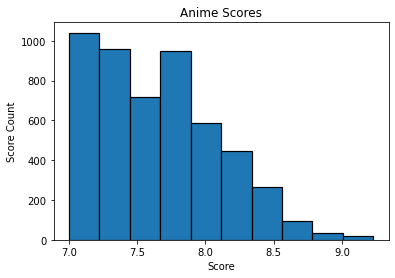

In [32]:
#data = anime_df.score
plt.hist(anime_cleaned_df['score'], bins = 10, edgecolor='black', linewidth=1.2, alpha=1)

plt.xlabel('Score')
plt.ylabel('Score Count')
plt.title('Anime Scores')


plt.show()

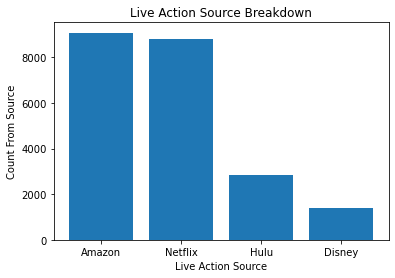

In [33]:
live_action_counts_df = pd.DataFrame(live_action_df['source'].value_counts())

x = live_action_counts_df.index
y = live_action_counts_df.source

plt.bar(x, y)
plt.xlabel('Live Action Source')
plt.ylabel('Count From Source')
plt.title('Live Action Source Breakdown')

plt.show()

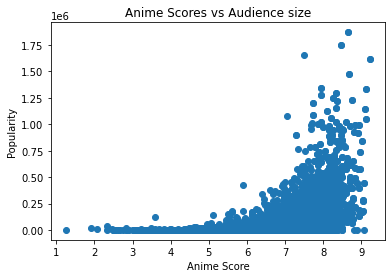

In [34]:
x= anime_df['score']
y= anime_df['members']

plt.scatter(x,y)
plt.xlabel('Anime Score')
plt.ylabel('Popularity')
plt.title('Anime Scores vs Audience size')

plt.show()

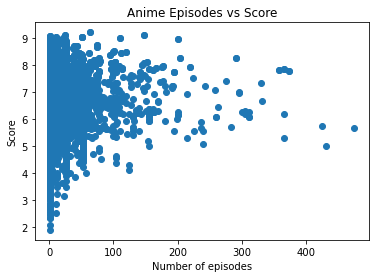

In [35]:
anime_test_df = anime_df[anime_df['episodes'] <500]

x= anime_test_df['episodes'] 
y= anime_test_df['score']

plt.scatter(x,y)
plt.xlabel('Number of episodes')
plt.ylabel('Score')
plt.title('Anime Episodes vs Score')

plt.show()

In [36]:
df = anime_cleaned_df.loc[(anime_cleaned_df['score']> 8.5) & (anime_cleaned_df['members']<250000)]
df

,uid,title,synopsis,members,popularity,ranked,score
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83
8,35247,Owarimonogatari 2nd Season,Following an encounter with oddity specialist ...,189944,573,18.0,8.93
11,34096,Gintama.,After joining the resistance against the bakuf...,139309,800,15.0,8.94
12,15335,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,When Gintoki apprehends a movie pirate at a pr...,135232,833,14.0,8.95
15,15417,Gintama': Enchousen,"While Gintoki Sakata was away, the Yorozuya fo...",166446,667,11.0,8.98
...,...,...,...,...,...,...,...
18056,37491,Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,Second Season of the final arc of Gintama .,67444,1557,32.0,8.76
18060,33095,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,Even after having risen to the utmost rank of ...,106792,1050,27.0,8.78
18064,35180,3-gatsu no Lion 2nd Season,"Now in his second year of high school, Rei Kir...",169544,657,9.0,9.02
18065,820,Ginga Eiyuu Densetsu,The 150-year-long stalemate between the two in...,175423,620,8.0,9.03


In [37]:
# live_action_df[live_action_df.duplicated('title')]

In [38]:
live_action_df[live_action_df['title'].str.contains('Shrek')]

,show_id,title,description,source,description_without_stopwords
2902,n-s2903,DreamWorks Shrek's Swamp Stories,"Shrek celebrates Halloween, Puss in Boots is c...",Netflix,"Shrek celebrates Halloween, Puss Boots capture..."
5936,n-s5937,Shrek the Musical,The greatest fairy tale never told comes to li...,Netflix,The greatest fairy tale never told comes life ...
836,h-s837,Shrek 2,After battling a fire-breathing dragon and the...,Hulu,After battling fire-breathing dragon evil Lord...
837,h-s838,Shrek 2 (en Español),Un viaje para conocer a los padres de Fiona se...,Hulu,Un viaje para conocer los padres de Fiona se c...
1079,h-s1080,Shrek,"Once upon a time, in a far away swamp, there l...",Hulu,"Once upon time, far away swamp, lived ornery o..."
2304,h-s2305,Shrek en Español,Vive las aventuras de Shrek para rescatar a la...,Hulu,Vive las aventuras de Shrek para rescatar la P...


In [39]:
#check columns with'Español' in title to potentially delete
live_action_df[live_action_df['title'].str.contains('Español')]

,show_id,title,description,source,description_without_stopwords
382,h-s383,Fear the Walking Dead en Español,"Compartiendo universo con ‘The Walking Dead’, ...",Hulu,"Compartiendo universo con ‘The Walking Dead’, ..."
536,h-s537,Pikwik Pack en Español,"Pikwik Pack sigue a cuatro adorables animales,...",Hulu,"Pikwik Pack sigue cuatro adorables animales, S..."
701,h-s702,My Little Pony: Pony Life en Español,¡Descubre el lado divertido de la amistad con ...,Hulu,¡Descubre el lado divertido de la amistad con ...
703,h-s704,Supernova en Español,Sam y Tusker son pareja desde hace 20 años. De...,Hulu,Sam Tusker son pareja desde hace 20 años. Desd...
837,h-s838,Shrek 2 (en Español),Un viaje para conocer a los padres de Fiona se...,Hulu,Un viaje para conocer los padres de Fiona se c...
1050,h-s1051,WWE en Español,Únete a los comentaristas de WWE en Español to...,Hulu,Únete los comentaristas de WWE en Español toda...
1324,h-s1325,The Purge en Español,"Una vez al año, todos los delitos (incluido el...",Hulu,"Una vez al año, todos los delitos (incluido el..."
1326,h-s1327,Treadstone en Español,"Del mundo de Jason Bourne, agentes alrededor d...",Hulu,"Del mundo de Jason Bourne, agentes alrededor d..."
1380,h-s1381,S.W.A.T. en Español,Dividido entre la lealtad al lugar dónde creci...,Hulu,Dividido entre la lealtad al lugar dónde creci...
1623,h-s1624,Community en Español,Obligado a volver a la escuela cuando su títul...,Hulu,Obligado volver la escuela cuando su título un...


In [40]:
# Trying to JSON-ify csv's to test input/output in JavaScript for updated website 
anime_json = pd.read_csv('Final Resources_copy/cleaned_anime.csv')
anime_json.head()

,Unnamed: 0,uid,title,synopsis,members,popularity,ranked,score
0,0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,141,25.0,8.82
1,1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,28,24.0,8.83
2,2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,98,23.0,8.83
3,3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,4,1.0,9.23
4,4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,502,22.0,8.83


In [41]:
anime_json = anime_json.to_json('Final Resources_copy/data.json',orient='records')

In [42]:
live_json = pd.read_csv('Final Resources_copy/cleaned_live_actions.csv')
live_json.head()

,Unnamed: 0,show_id,title,description,source,description_without_stopwords
0,0,n-s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm...",Netflix,"As father nears end life, filmmaker Kirsten Jo..."
1,1,n-s2,Blood & Water,"After crossing paths at a party, a Cape Town t...",Netflix,"After crossing paths party, Cape Town teen set..."
2,2,n-s3,Ganglands,To protect his family from a powerful drug lor...,Netflix,"To protect family powerful drug lord, skilled ..."
3,3,n-s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo...",Netflix,"Feuds, flirtations toilet talk go among incarc..."
4,4,n-s5,Kota Factory,In a city of coaching centers known to train I...,Netflix,In city coaching centers known train India’s f...


In [44]:
live_json = live_json.to_json('Final Resources_copy/live_data.json', orient = 'records')